## 

In [13]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
data_sensors = pd.read_csv("sensor.csv")

In [4]:
data_sensors.shape

(220320, 55)

In [5]:
data_sensors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [6]:
data_sensors.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [7]:
100*data_sensors['machine_status'].value_counts()/len(data_sensors)

NORMAL        93.425926
RECOVERING     6.570897
BROKEN         0.003177
Name: machine_status, dtype: float64

In [9]:
columns = [col for col in data_sensors.columns if not col.find('sensor')]
for col in columns:
    data_sensors[col] = data_sensors[col].fillna(data_sensors[col].mean())

In [10]:
data_sensors.isna().sum()

Unnamed: 0             0
timestamp              0
sensor_00              0
sensor_01              0
sensor_02              0
sensor_03              0
sensor_04              0
sensor_05              0
sensor_06              0
sensor_07              0
sensor_08              0
sensor_09              0
sensor_10              0
sensor_11              0
sensor_12              0
sensor_13              0
sensor_14              0
sensor_15         220320
sensor_16              0
sensor_17              0
sensor_18              0
sensor_19              0
sensor_20              0
sensor_21              0
sensor_22              0
sensor_23              0
sensor_24              0
sensor_25              0
sensor_26              0
sensor_27              0
sensor_28              0
sensor_29              0
sensor_30              0
sensor_31              0
sensor_32              0
sensor_33              0
sensor_34              0
sensor_35              0
sensor_36              0
sensor_37              0


In [11]:
#Removing sensor_15
data_sensors = data_sensors.drop(['sensor_15','Unnamed: 0'],axis=1)

## showing with X mark in plots the statut Broken 

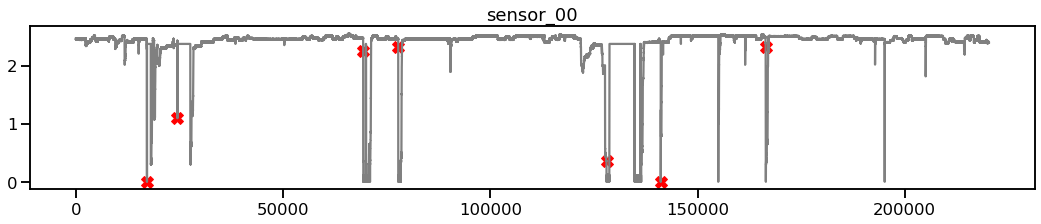

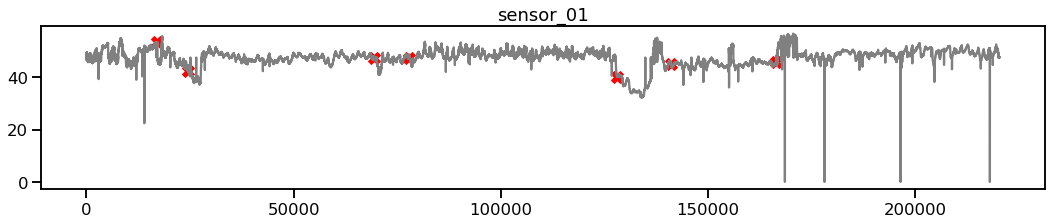

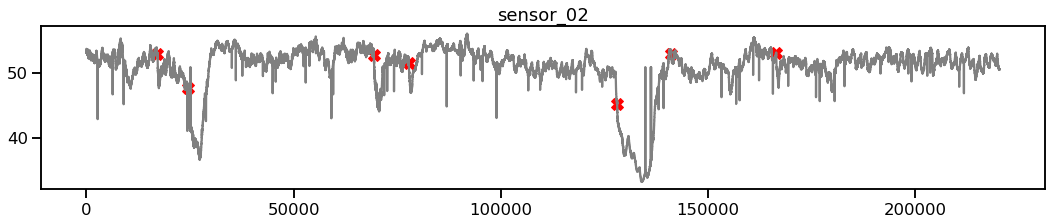

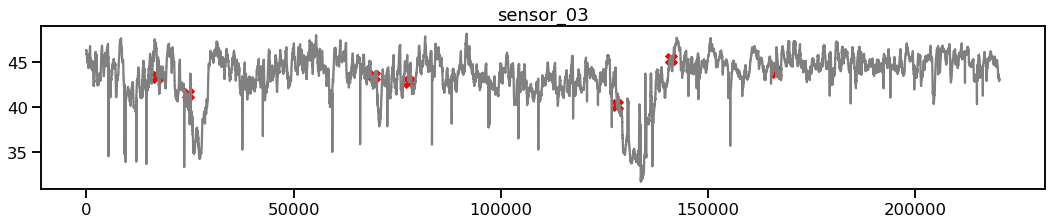

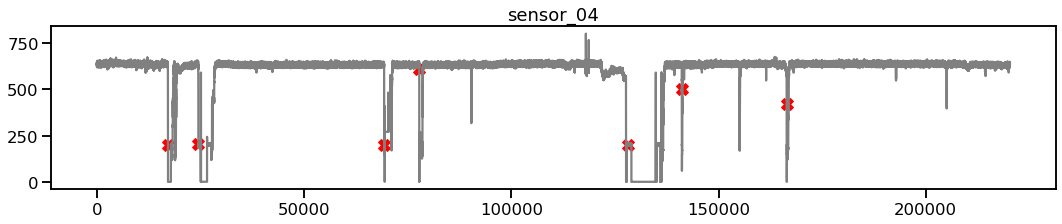

In [35]:
#check where the machine is broken according to sensor
dfBroken = data_sensors[data_sensors['machine_status']=='BROKEN']
dfSensors = data_sensors.drop(['machine_status'], axis=1)
sensorNames=dfSensors.columns
for sensor in sensorNames[1:6]:
    sns.set_context('talk')
    _ = plt.figure(figsize=(18,3))
    _ = plt.plot(dfBroken[sensor], linestyle='none', marker='X', color='red', markersize=12)
    _ = plt.plot(data_sensors[sensor], color='grey')
    _ = plt.title(sensor)
    plt.show()

<AxesSubplot:>

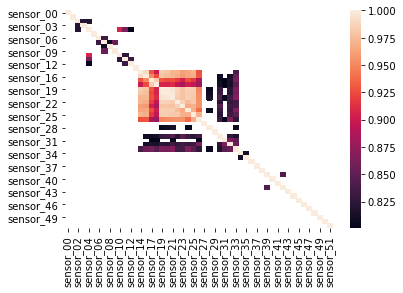

In [14]:
#Correlations
corr = data_sensors.corr()
corr80 = corr[abs(corr)> 0.8]
sns.heatmap(corr80)

## PCA(The principal components) : a collection of points in a real coordinate space are a sequence of p unit vectors, where the i-th vector is the direction of a line that best fits the data while being orthogonal to the first i-1 vectors. 
## PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. 

## Fit the model with data and apply the dimensionality reduction.

In [19]:
from sklearn.decomposition import PCA

data = data_sensors[[sensor for sensor in data_sensors.columns.tolist() if not sensor.find('sensor')]]

pca = PCA(n_components=2)
data_reduce = pca.fit_transform(data)

## The pca.explained_variance_ratio_ parameter returns a vector of the variance explained by each dimension.

In [22]:
print(pca.explained_variance_ratio_)


[0.73422252 0.0825578 ]


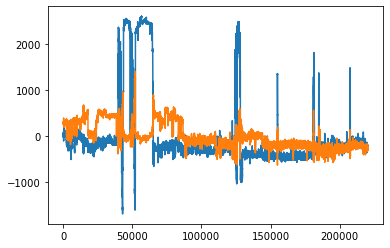

In [23]:
import matplotlib.pyplot as plt
plt.plot(data_reduce)

## The vector autoregressive (VAR) model is a workhouse multivariate time series model that relates current observations of a variable with past observations of itself and past observations of other variables in the system

## in the VAR model we will use the method 'ordinary least squares' (OLS) or linear least squares its a method for estimating the unknown parameters in a linear regression model. 

## This method minimizes the sum of squared vertical distances between the observed responses in the dataset and the responses predicted by the linear approximation. 

In [24]:
from statsmodels.tsa.api import VAR
model = VAR(pd.DataFrame(data_reduce))
results = model.fit(2)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 23, May, 2022
Time:                     00:13:00
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    11.9096
Nobs:                     220318.    HQIC:                   11.9093
Log likelihood:      -1.93713e+06    FPE:                    148623.
AIC:                      11.9092    Det(Omega_mle):         148616.
--------------------------------------------------------------------
Results for equation 0
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        -0.001833         0.058223           -0.031           0.975
L1.0          0.803884         0.002608          308.225           0.000
L1.1          0.065400         0.004099           15.956           0.000
L2.0          0.195675 

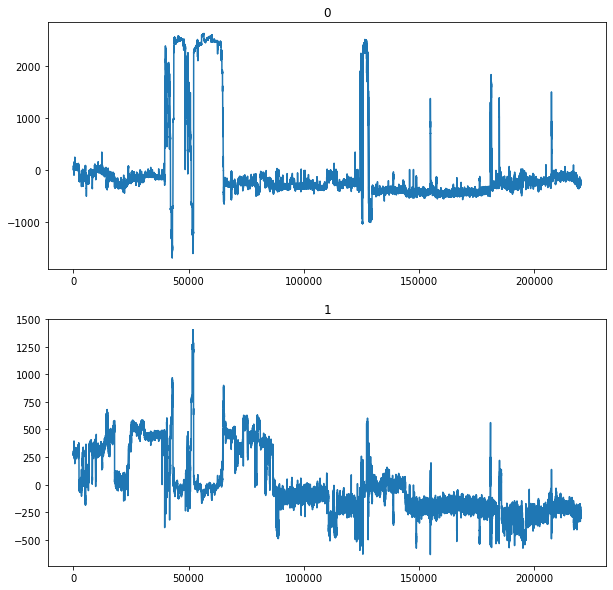

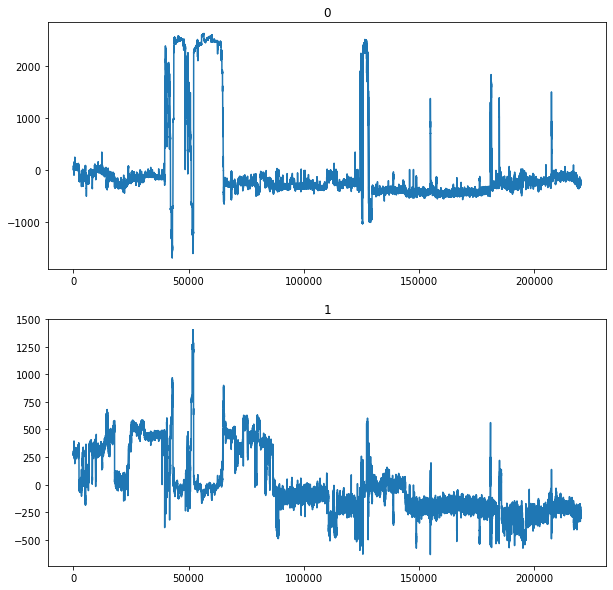

In [25]:
results.plot()


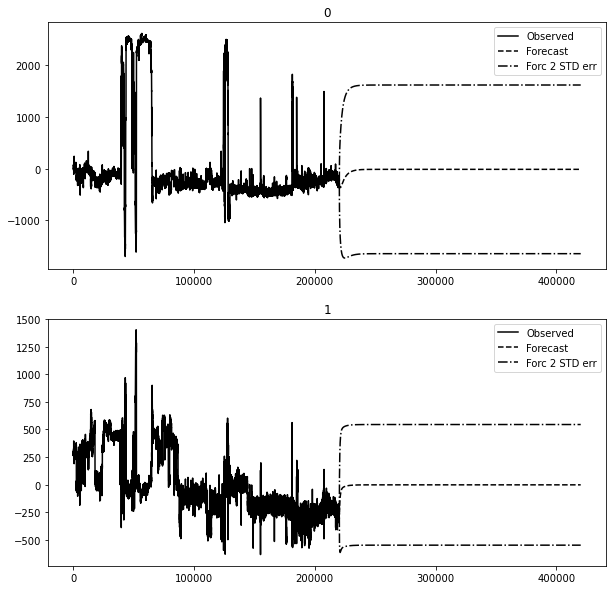

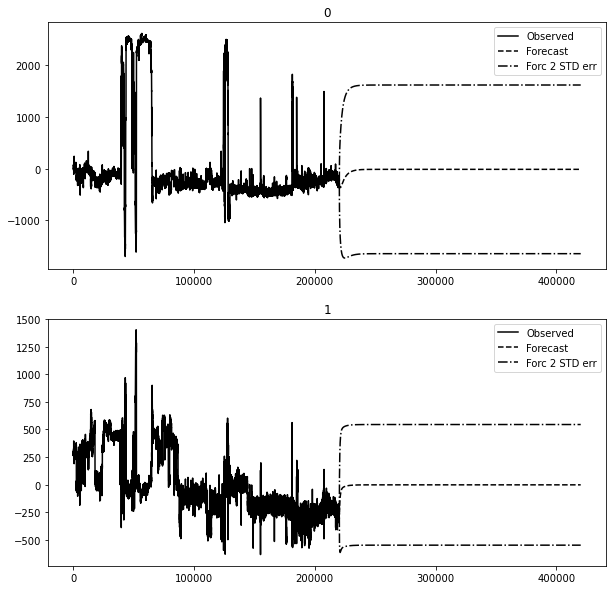

In [26]:
results.plot_forecast(200000)


In [38]:
import datetime

format_str = '%Y-%m-%d %H:%M:%S'  # The format

data_sensors['timestamp'] = pd.DataFrame([datetime.datetime.strptime(date, format_str) for date in data_sensors['timestamp']])

In [39]:
import janitor

def calculate_rul(df):
    
    df_broken = df[df['machine_status'] == 'BROKEN']
    L=[]
    d = df['timestamp'].iloc[0]
    for date_broken in df_broken['timestamp']:
        
        df_filtered = df.filter_date('timestamp',d, date_broken)
        df_filtered['rul'] = date_broken - df_filtered['timestamp']
        
        L.append(df_filtered)
        d = date_broken
    
    result = pd.concat(L)
    

    return result.loc[~result.index.duplicated(keep='first')] #remove duplicates indices

df_rul = calculate_rul(data_sensors)

<ipython-input-39-82e90f6b75ab>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['rul'] = date_broken - df_filtered['timestamp']


In [40]:
df_rul['rul']
delta_t = np.timedelta64(4, 'D')
delta_t_2 = np.timedelta64(2, 'D')
# Label1 indicates a failure will occur within the next 30 cycles.
# 1 indicates failure, 0 indicates healthy 
df_rul['label1'] = np.where(df_rul['rul'] <= delta_t, 1, 0 )

In [41]:
from sklearn.preprocessing import MinMaxScaler

cols_normalize = df_rul.columns.difference(['id','timestamp','rul','label1','label2','machine_status'])

scaler = MinMaxScaler()

df_rul[cols_normalize] = scaler.fit_transform(df_rul[cols_normalize])
df_rul["rul"] = df_rul["rul"].apply(lambda x: x.total_seconds()/3600) #converting to hours

In [42]:
#separate in train and test dataset
df_rul[df_rul['machine_status'] =="BROKEN"]

df_rul['time_norm']= df_rul['timestamp'].values.tolist()
df_rul["time_norm"] = (df_rul["time_norm"]-df_rul["time_norm"].min())/(df_rul["time_norm"].max()-df_rul["time_norm"].min())

train_df = df_rul.iloc[:77790,:].drop(['machine_status',"timestamp"],axis=1)
train_df["time_norm"] = (train_df["time_norm"]-train_df["time_norm"].min())/(train_df["time_norm"].max()-train_df["time_norm"].min())


test_df = df_rul.iloc[77791:,:].drop(['machine_status',"timestamp"],axis=1)
test_df["time_norm"] = (test_df["time_norm"]-test_df["time_norm"].min())/(test_df["time_norm"].max()-test_df["time_norm"].min())

train_df['rul'] = train_df['rul'].values.tolist()
test_df['rul'].describe()

count    88650.000000
mean       313.676782
std        231.096187
min          0.000000
25%        123.116667
50%        260.275000
75%        468.112500
max        837.483333
Name: rul, dtype: float64

In [43]:
features_col_name=[column for column in data_sensors.columns if not column.find('sensor')]
target_col_name='label1'

features_col_name

['sensor_00',
 'sensor_01',
 'sensor_02',
 'sensor_03',
 'sensor_04',
 'sensor_05',
 'sensor_06',
 'sensor_07',
 'sensor_08',
 'sensor_09',
 'sensor_10',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_16',
 'sensor_17',
 'sensor_18',
 'sensor_19',
 'sensor_20',
 'sensor_21',
 'sensor_22',
 'sensor_23',
 'sensor_24',
 'sensor_25',
 'sensor_26',
 'sensor_27',
 'sensor_28',
 'sensor_29',
 'sensor_30',
 'sensor_31',
 'sensor_32',
 'sensor_33',
 'sensor_34',
 'sensor_35',
 'sensor_36',
 'sensor_37',
 'sensor_38',
 'sensor_39',
 'sensor_40',
 'sensor_41',
 'sensor_42',
 'sensor_43',
 'sensor_44',
 'sensor_45',
 'sensor_46',
 'sensor_47',
 'sensor_48',
 'sensor_49',
 'sensor_50',
 'sensor_51']

In [44]:
# window size
seq_length=100
seq_cols=features_col_name

In [45]:
def gen_sequence(id_df, seq_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    # for one id I put all the rows in a single matrix
    data_matrix = id_df[seq_cols].values
    num_elements = data_matrix.shape[0]
    # Iterate over two lists in parallel.
    # For example id1 have 192 rows and sequence_length is equal to 50
    # so zip iterate over two following list of numbers (0,112),(50,192)
    # 0 50 -> from row 0 to row 50
    # 1 51 -> from row 1 to row 51
    # 2 52 -> from row 2 to row 52
    # ...
    # 111 191 -> from row 111 to 191
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_matrix[start:stop, :]

# function to generate labels
def gen_labels(id_df, seq_length, label): 
    data_matrix = id_df[label].values
    num_elements = data_matrix.shape[0]
    return data_matrix[seq_length:num_elements, :]

In [46]:
# generate X_train for LSTM 3D dimension array
seq_gen = [list(gen_sequence(train_df, seq_length, seq_cols))]

seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
print(seq_array.shape)

label_gen = [gen_labels(train_df, seq_length, ['label1'])]

label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(77690, 100, 51)


(77690, 1)

In [47]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential
from sklearn import datasets
from keras.layers import Dense, Dropout, LSTM, Activation

ModuleNotFoundError: No module named 'keras'